In [2]:
for i in range(21):
    raw = pd.read_csv(r'C:\Users\com\[MSB535]\data\Breau Data\{}\{}.csv'.format(2000+i,2000+i))
    raw['YEAR'] = 2000+i
    raw = raw.drop([raw.columns[7]], axis = 1)
    if i == 0 :
        data = raw
    else:
        data = pd.concat([data,raw]) 
data.to_csv(r'C:\Users\com\[MSB535]\data\Breau Data\Data.csv')

In [18]:
url = "https://www.investing.com/instruments/HistoricalDataAjax"
head = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.183 Safari/537.36',
    'X-Requested-With': 'XMLHttpRequest'
}
payload = {
    'curr_id': '43514',
'smlID': '1312682',
'header': '003490 Historical Data',
'st_date': '01/01/2000',
'end_date': '05/01/2020',
'interval_sec': 'Monthly',
'sort_col': 'date',
'sort_ord': 'DESC',
'action': 'historical_data',
}
result = requests.post(url, headers = head, data = payload)
result.status_code
temp = BeautifulSoup(result.text)
stockdata = pd.read_html(str(temp.find('table')))[0]
for i in range(len(stockdata['Date'])):
    if stockdata['Date'][i].split()[0] == 'Jan':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 01. 25.'
    elif stockdata['Date'][i].split()[0] == 'Feb':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 02. 25.'
    elif stockdata['Date'][i].split()[0] == 'Mar':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 03. 25.'
    elif stockdata['Date'][i].split()[0] == 'Apr':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 04. 25.'
    elif stockdata['Date'][i].split()[0] == 'May':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 05. 25.'
    elif stockdata['Date'][i].split()[0] == 'Jun':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 06. 25.'
    elif stockdata['Date'][i].split()[0] == 'Jul':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 07. 25.'
    elif stockdata['Date'][i].split()[0] == 'Aug':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 08. 25.'
    elif stockdata['Date'][i].split()[0] == 'Sep':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 09. 25.'
    elif stockdata['Date'][i].split()[0] == 'Oct':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 10. 25.'
    elif stockdata['Date'][i].split()[0] == 'Nov':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 11. 25.'
    elif stockdata['Date'][i].split()[0] == 'Dec':
        stockdata['Date'][i] = '20'+stockdata['Date'][i].split()[1]+'. 12. 25.'
stockdata.to_excel(excel_writer=r'C:\Users\com\[MSB535]\data\Breau Data\stock_Korean.xlsx')

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import traceback
import statsmodels.api as sm
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
data =pd.read_csv(r'C:\Users\com\[MSB535]\data\Breau Data\Data.csv')

In [ ]:
x = pd.read_csv(r'path of exlcel file of variable x')
y = pd.read_csv(r'path of exlcel file of variable y')

In [7]:
data['FREIGHT']

0             4000.0
1           255029.0
2             3482.0
3            88864.0
4                0.0
5            16662.0
6            15861.0
7           103690.0
8            71342.0
9           430142.0
10               0.0
11           30274.0
12               0.0
13             378.0
14            1038.0
15           78456.0
16           17824.0
17          871200.0
18         2059627.0
19           69039.0
20          222200.0
21           65098.0
22           11801.0
23          987045.0
24          611975.0
25          136400.0
26          398200.0
27          771373.0
28          102430.0
29             336.0
             ...    
1432866      25977.0
1432867     961182.0
1432868          0.0
1432869     328722.0
1432870     229792.0
1432871    2443137.0
1432872     683173.0
1432873     493632.0
1432874     179282.0
1432875    1316471.0
1432876      37067.0
1432877       4110.0
1432878      17897.0
1432879       7804.0
1432880          0.0
1432881        904.0
1432882      

In [3]:
company_name = []
for keys in data['UNIQUE_CARRIER_NAME']:
    if keys in company_name :
        continue
    else :
        company_name.append(keys)            

In [4]:
for lines in company_name:
    if "Korean" in lines:
        print(lines)

Korean Air Lines Co. Ltd.


TypeError: argument of type 'float' is not iterable

In [5]:
company = 'Korean Air Lines Co. Ltd.'
savename= 'Deltaair'

In [6]:
info = []
threeones = ['1','3','5','7','8','10','12']
thirtys = ['4','6','9','11']
twoeights = ['2']
year = 2000
month = 1
is_company = data['UNIQUE_CARRIER_NAME'] == company
for i in range(21):
    month = 1
    for j in range(12):
        is_month = data['MONTH'] == month
        is_year = data['YEAR'] == year
        classifier = is_company & is_month & is_year
        passengers = data[classifier]['PASSENGERS'].sum()
        freight = data[classifier]['FREIGHT'].sum() + data[classifier]['MAIL'].sum()
        if str(month) in twoeights:
            date = str(year)+'. 0'+str(month)+'. 25.'
        elif str(month) in thirtys:
            if len(str(month)) == 1:
                date = str(year)+'. 0'+str(month)+'. 25.'
            else:
                date = str(year)+'. '+str(month)+'. 25.'
        elif str(month) in threeones:
            if len(str(month)) == 1:
                date = str(year)+'. 0'+str(month)+'. 25.'
            else:
                date = str(year)+'. '+str(month)+'. 25.'
        info.append([company, year, month, date, passengers, freight])
        month += 1
    year += 1
temp = pd.DataFrame(info,columns = ['Company','Year','Month','Date','Passenger','Freight'])
table = temp[temp['Passenger']!=0]
globals()['table_{}'.format(savename)]=table

In [7]:
stockdata =pd.read_excel(r'C:\Users\com\[MSB535]\data\Breau Data\stock_Korean.xlsx')

In [8]:
year = 20
while True:
    if year == 0:
        break
    count = 0
    for i in range(len(stockdata['Date'])):
        if stockdata['Date'][i].split()[0].rstrip('.')[2:4].lstrip('0') == str(year):
            count +=1
    if count < 12:
        print('Year of ' + str(year)+' has lower month by '+str(count))
    year = year-1

Year of 20 has lower month by 5
Year of 13 has lower month by 11
Year of 3 has lower month by 3
Year of 2 has lower month by 0
Year of 1 has lower month by 0


In [9]:
floated = []
for i in range(len(stockdata['Change %'])):
    floated.append(float(stockdata['Change %'].values[i].rstrip('%')))
stockdata['Change(float)'] = floated

In [10]:
newdate = []
for i in range(len(table_Deltaair['Date'])):
    date = ''
    for j in range(len(table_Deltaair['Date'][i].split())):
        if j == 2:
            date += table_Deltaair['Date'][i].split()[j].strip().rstrip('.')
        else:
            date += table_Deltaair['Date'][i].split()[j].strip().rstrip('.')+'-'
    newdate.append(date)
table_Deltaair['newdate'] = newdate
temp = table_Deltaair[table_Deltaair['Year']<2020]
table_Deltaair = temp

C:\Users\com\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [11]:
table_Deltaair.tail()

,Company,Year,Month,Date,Passenger,Freight,newdate
235,Korean Air Lines Co. Ltd.,2019,8,2019. 08. 25.,280966.0,54933666.0,2019-08-25
236,Korean Air Lines Co. Ltd.,2019,9,2019. 09. 25.,252413.0,51792864.0,2019-09-25
237,Korean Air Lines Co. Ltd.,2019,10,2019. 10. 25.,272078.0,56876168.0,2019-10-25
238,Korean Air Lines Co. Ltd.,2019,11,2019. 11. 25.,252202.0,60191329.0,2019-11-25
239,Korean Air Lines Co. Ltd.,2019,12,2019. 12. 25.,280803.0,57518642.0,2019-12-25


In [12]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100,colors = 'color'):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color=colors)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(np.arange(0,len(x),step = 30),x[np.arange(0,len(x),step = 30)])
    plt.show()

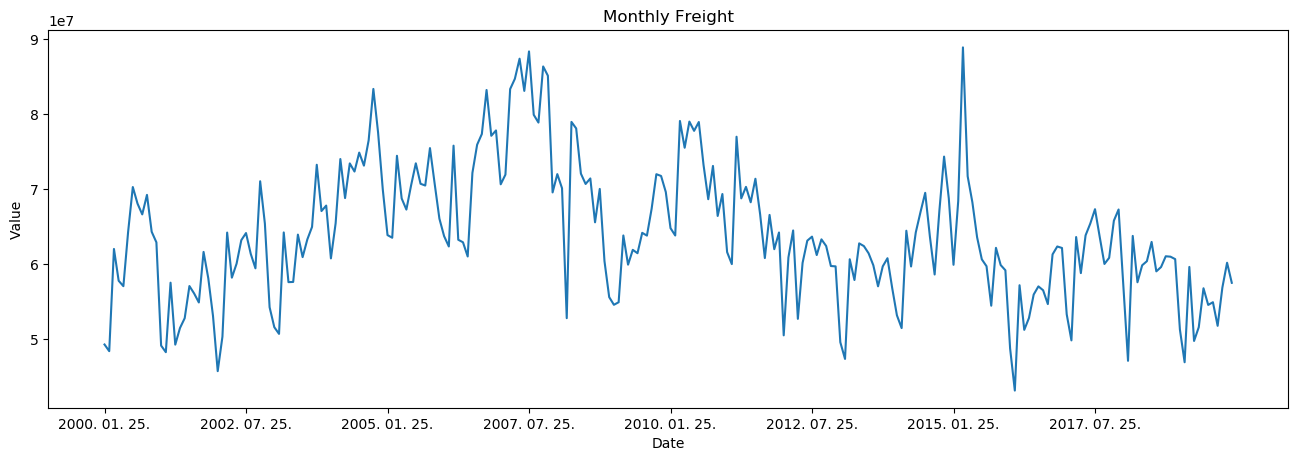

In [13]:
what = 'Freight'
ts_Deltaair = pd.DataFrame(table_Deltaair[what].values,index = table_Deltaair['Date'],columns = [what])
plot_df(ts_Deltaair, x=ts_Deltaair.index, y=ts_Deltaair[what].values, title='Monthly {}'.format(what), colors = 'tab:Blue')


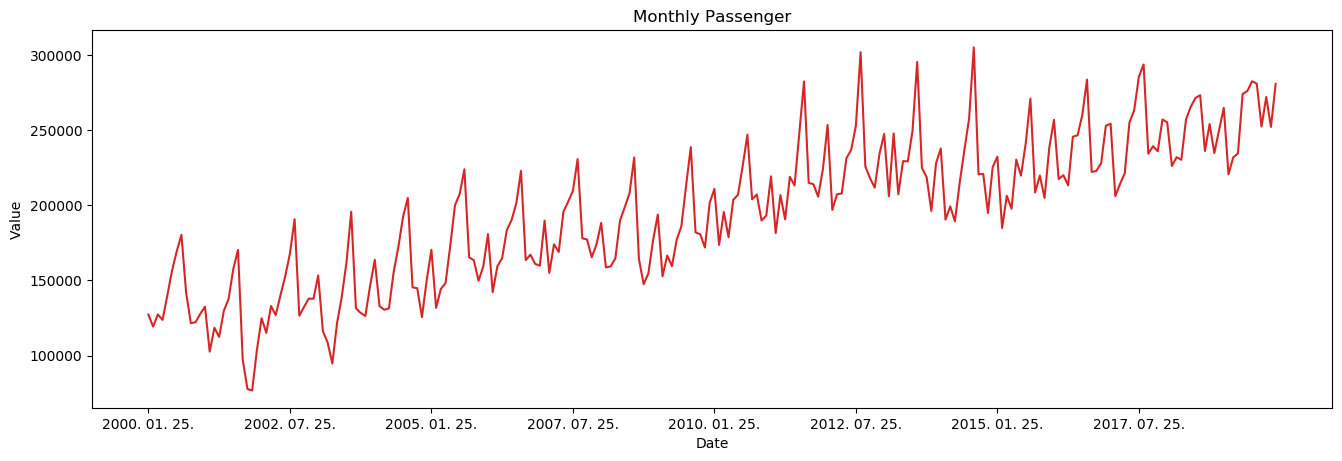

In [14]:
what = 'Passenger'
ts_Deltaair = pd.DataFrame(table_Deltaair[what].values,index = table_Deltaair['Date'],columns = [what])
plot_df(ts_Deltaair, x=ts_Deltaair.index, y=ts_Deltaair[what].values, title='Monthly {}'.format(what), colors = 'tab:red')

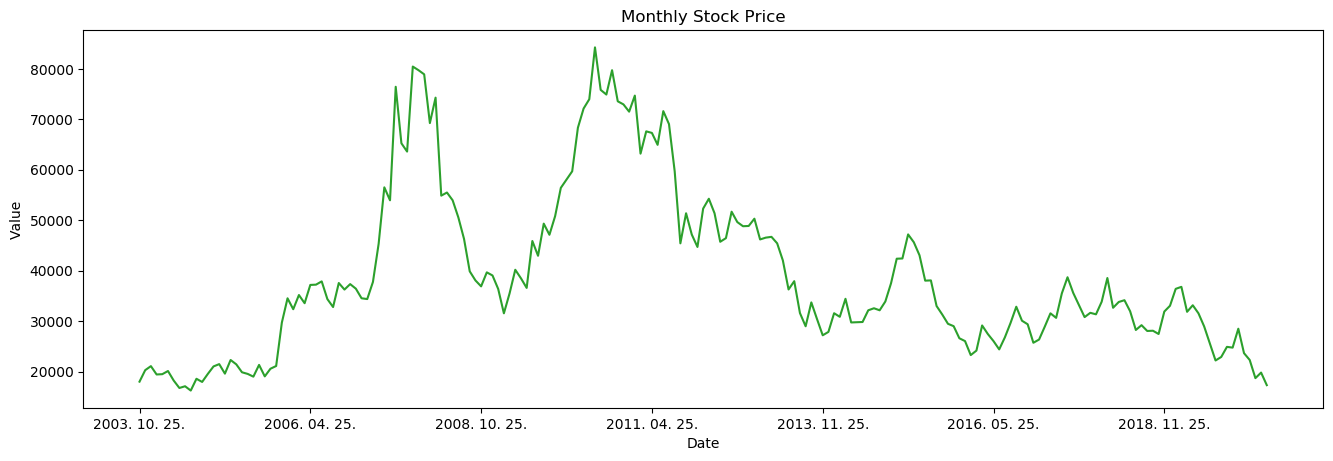

In [15]:
what = 'Price'
#Price or Change(float'
stock_Deltaair = pd.DataFrame(stockdata.loc[::-1][what].values,index = stockdata.loc[::-1]['Date'],columns = [what])
plot_df(stock_Deltaair, x=stock_Deltaair.index, y=stock_Deltaair[what].values, title='Monthly Stock Price',colors = 'tab:Green')

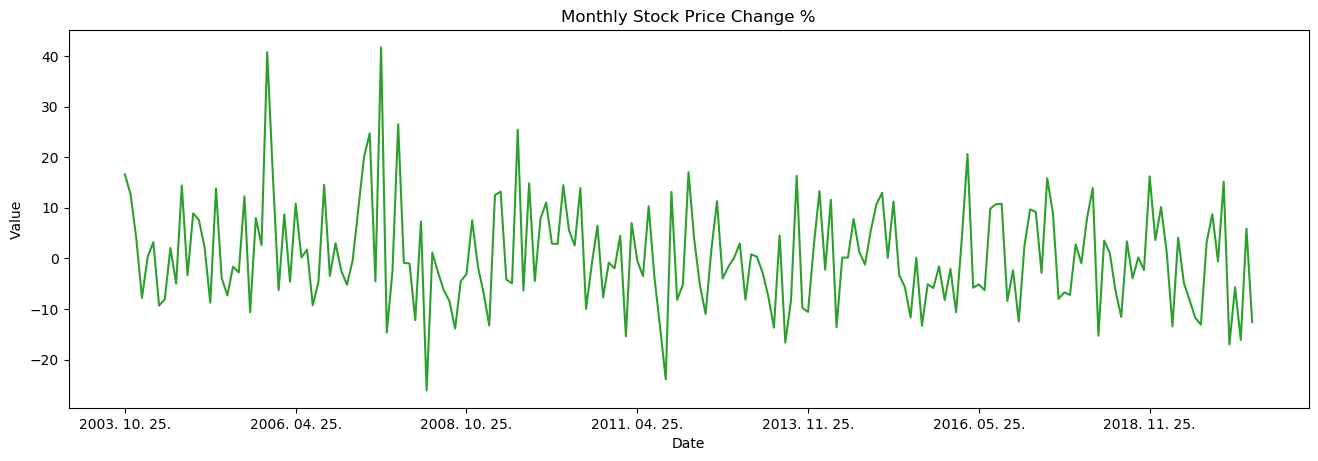

In [16]:
what = 'Change(float)'
#Price or Change(float)'
stock_Deltaair = pd.DataFrame(stockdata.loc[::-1][what].values,index = stockdata.loc[::-1]['Date'],columns = [what])
plot_df(stock_Deltaair, x=stock_Deltaair.index, y=stock_Deltaair[what].values, title='Monthly Stock Price Change %',colors = 'tab:Green')

In [17]:
import statsmodels.api as sm
from datetime import datetime
from pylab import rcParams

In [18]:
datetime = []
for i in range(len(table_Deltaair['newdate'])):
    datetime.append(pd.to_datetime(table_Deltaair['newdate'][i], format='%Y-%m-%d'))
table_Deltaair['datetime'] = datetime

C:\Users\com\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


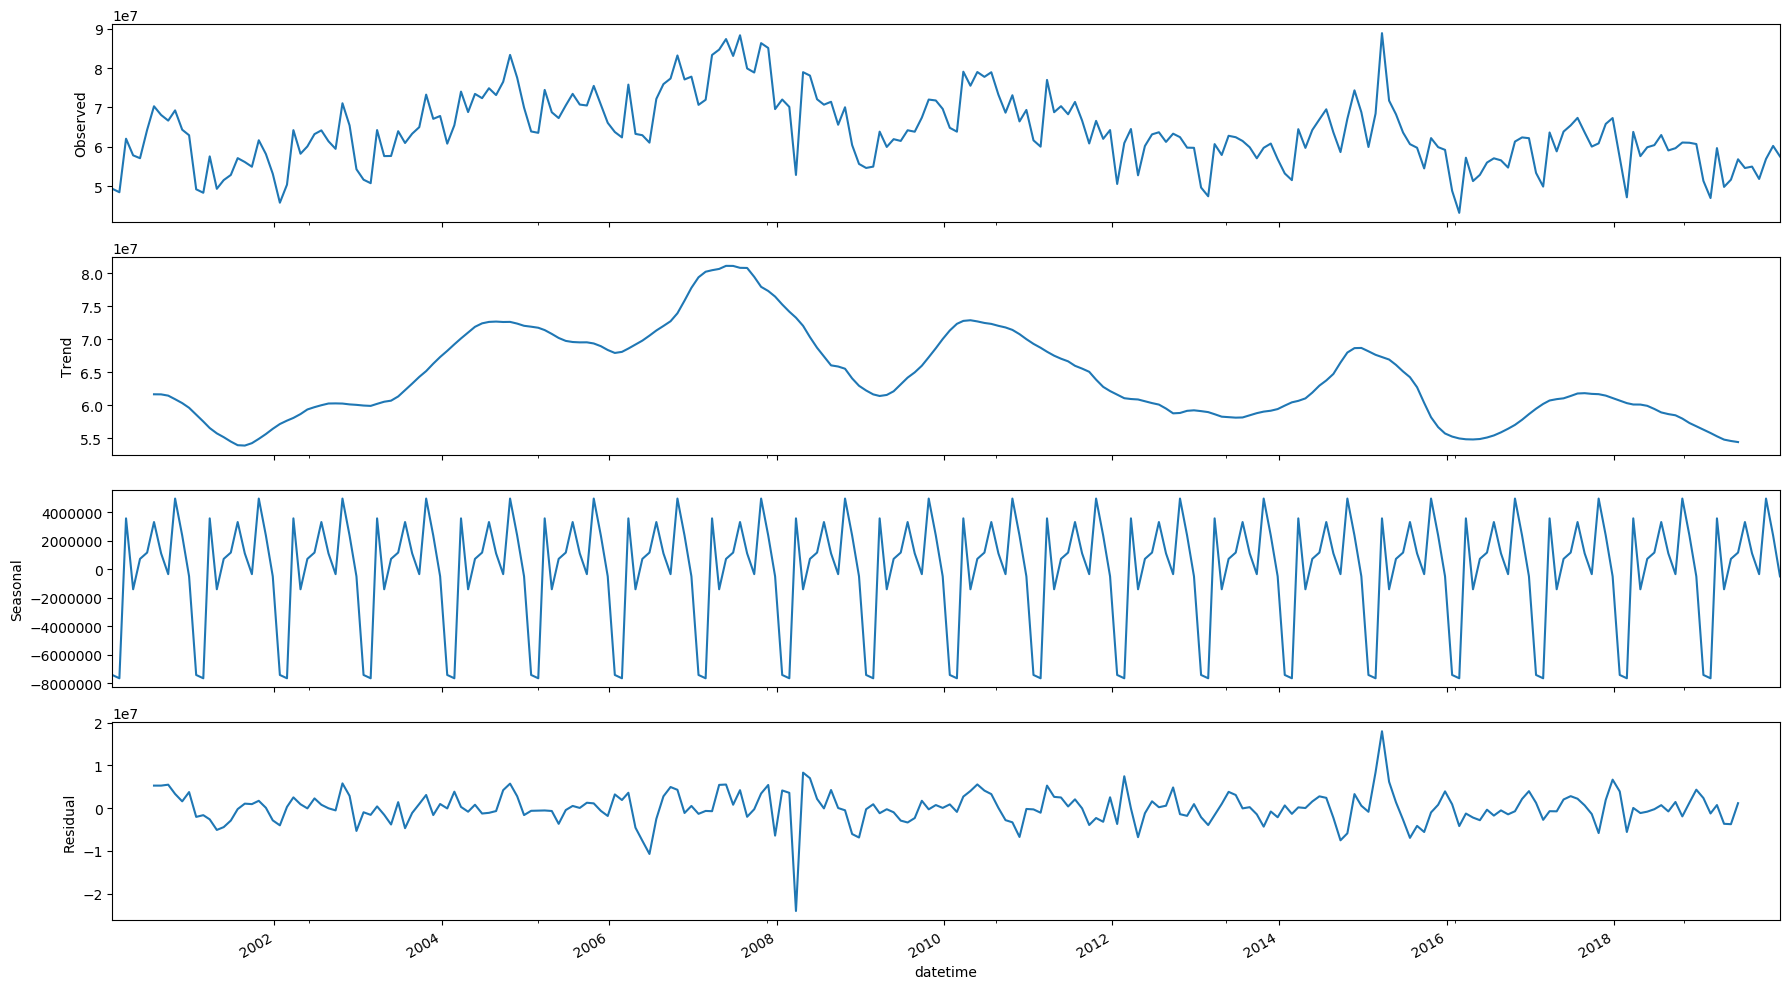

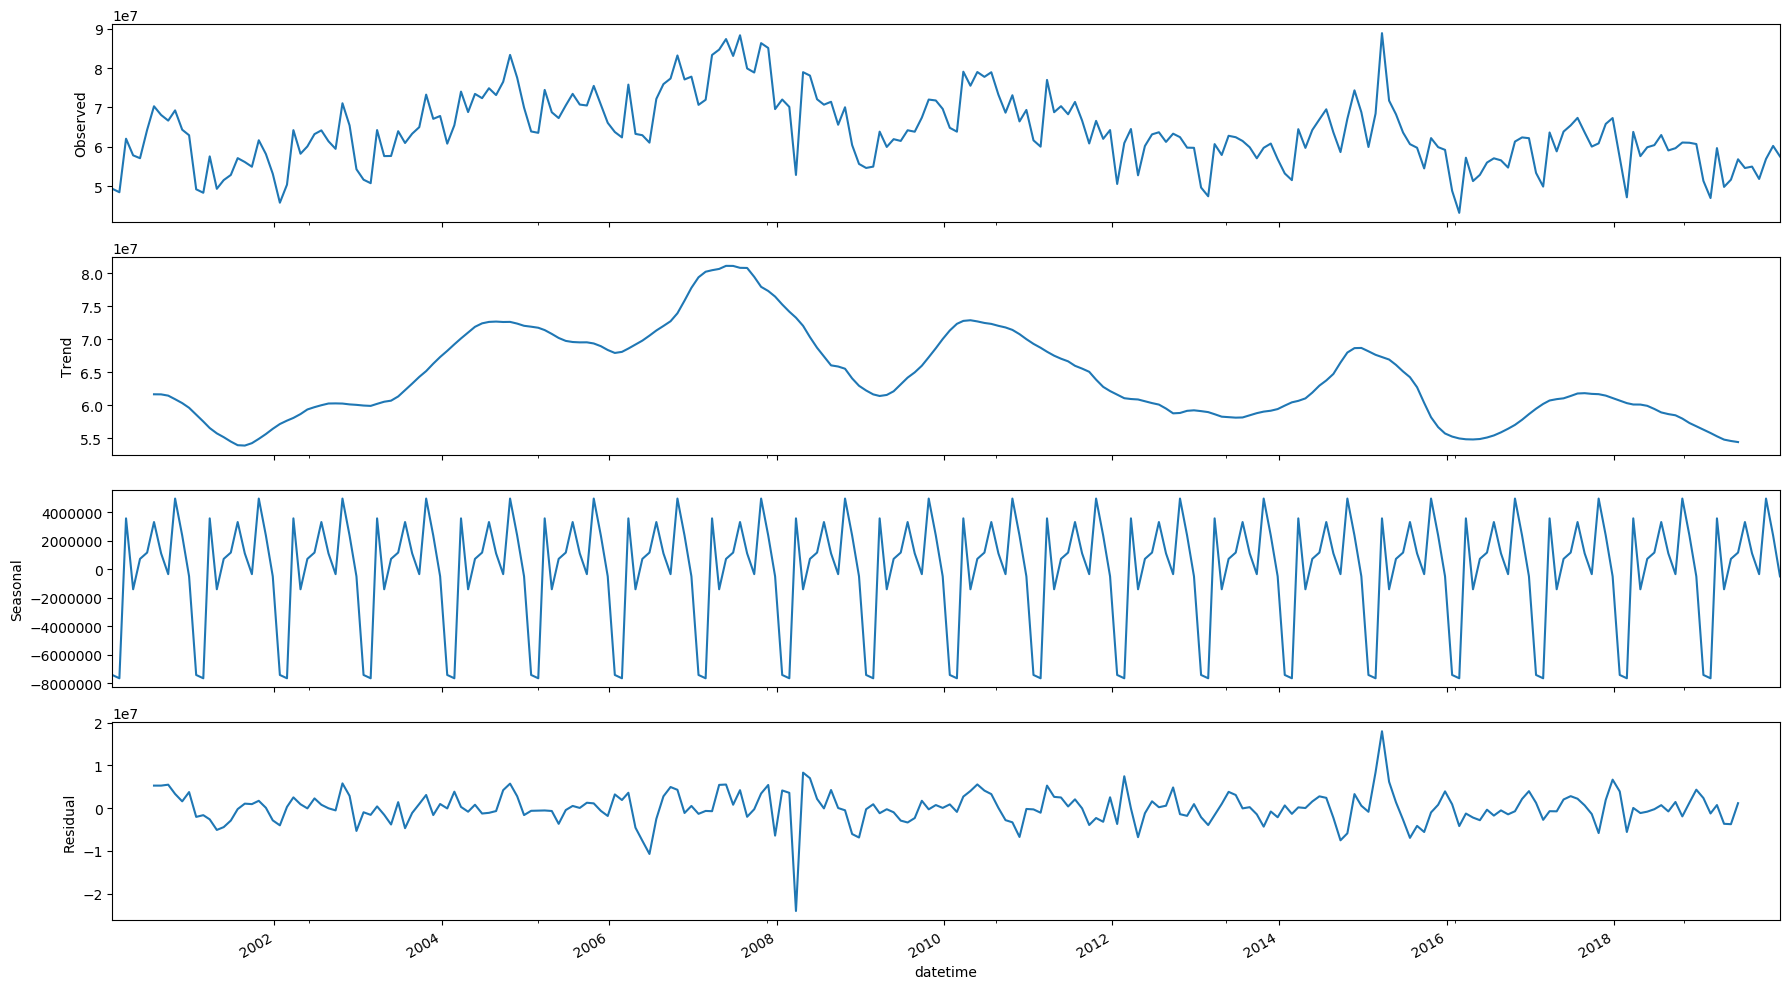

In [19]:
what = 'Freight'
temp = pd.DataFrame(table_Deltaair[what].values,index = table_Deltaair['datetime'],columns = [what])
ts_Deltaair = temp[temp[what] !=0]
rcParams['figure.figsize'] = 18, 10
rcParams['figure.dpi'] = 100
decomposition = sm.tsa.seasonal_decompose(ts_Deltaair, model='additive', freq = 12)
decomposition.plot()

In [20]:
temp = sm.tsa.seasonal_decompose(ts_Deltaair, model='additive', freq = 12).trend
table_trend = temp[temp[what].notnull()]
newdate = []
for i in range(len(stockdata['Date'])):
    date = ''
    for j in range(len(stockdata['Date'][i].split())):
        if j == 2:
            date += stockdata['Date'][i].split()[j].strip().rstrip('.')
        else:
            date += stockdata['Date'][i].split()[j].strip().rstrip('.')+'-'
    newdate.append(date)
stockdata['newdate'] = newdate
datetime = []
for i in range(len(stockdata['Date'])):
    datetime.append(pd.to_datetime(stockdata['newdate'][i], format='%Y-%m-%d'))
stockdata['datetime'] = datetime
stockdata.head()
price = []
date = []
for i in range(len(table_trend)):
    if stockdata[stockdata['datetime'] == table_trend.index[i]]['Price'].size != 0:
        price.append(stockdata[stockdata['datetime'] == table_trend.index[i]]['Price'].values)          
        date.append(table_trend.index[i])
chart_info = pd.DataFrame(price, index = date, columns = ['Price'])
chart_info[what] = table_trend[what]
chart_info.to_excel(excel_writer=r'C:\Users\com\[MSB535]\data\Breau Data\{} {}.xlsx'.format(company,what))

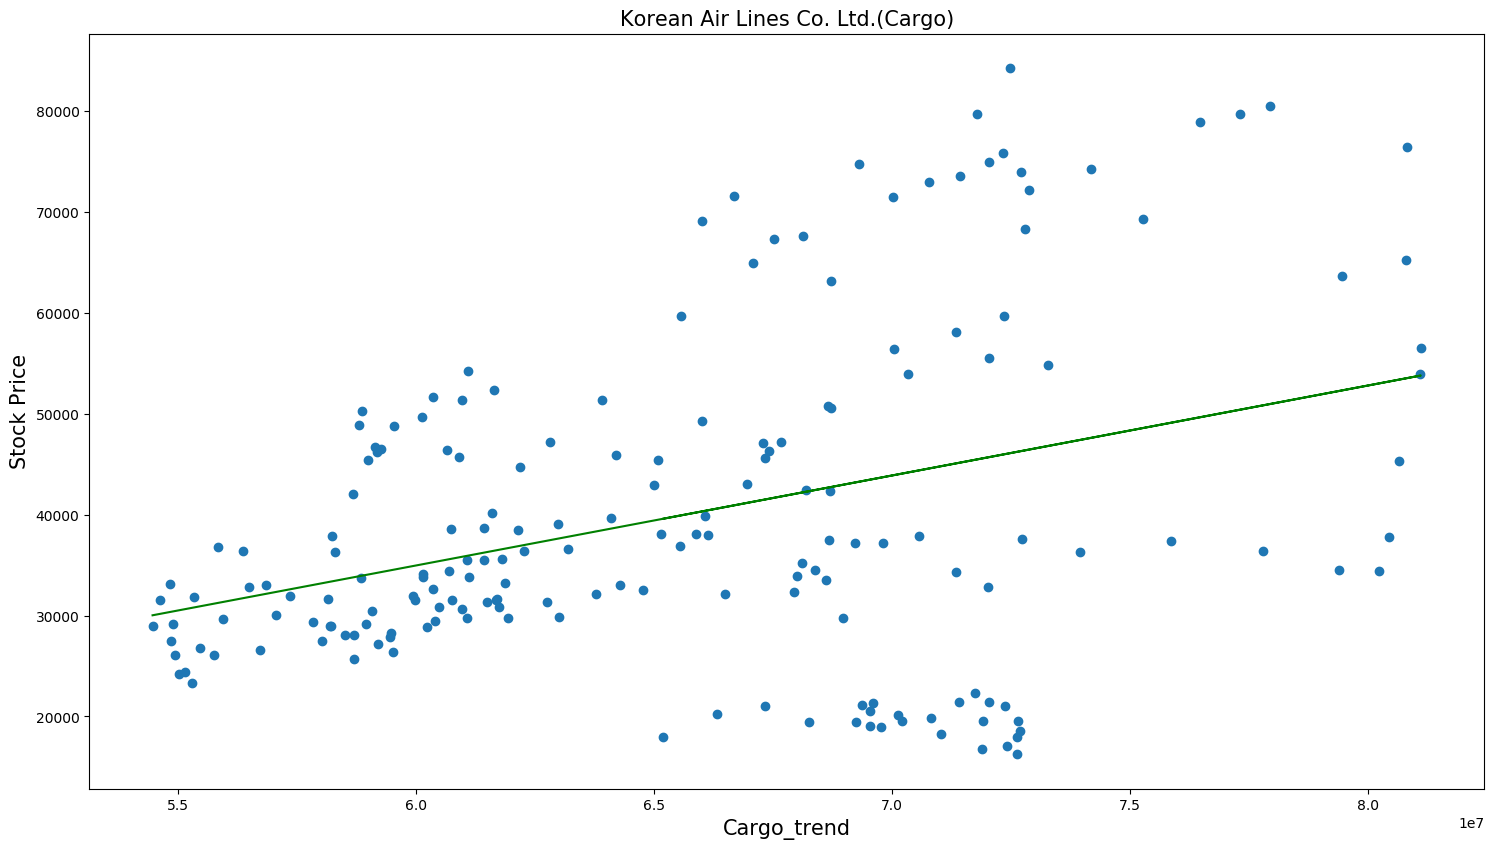

In [21]:
line = LinearRegression()
y_value = chart_info['Price']
x_value = chart_info[what].values
line.fit(x_value.reshape(-1,1),y_value)
plt.plot(x_value, y_value, 'o')
plt.plot(x_value,line.predict(x_value.reshape(-1,1)), color = 'green')
plt.title('{}(Cargo)'.format(company), fontsize = 15)
plt.xlabel('Cargo_trend', fontsize = 15)
plt.ylabel('Stock Price', fontsize = 15)
plt.show()

In [22]:
x_value = sm.add_constant(x_value,has_constant='add')
model = sm.OLS(y_value,x_value)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     29.51
Date:                Thu, 03 Dec 2020   Prob (F-statistic):           1.72e-07
Time:                        12:25:41   Log-Likelihood:                -2074.8
No. Observations:                 188   AIC:                             4154.
Df Residuals:                     186   BIC:                             4160.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.853e+04   1.08e+04     -1.716      0.088   -3.98e+04    2775.613
x1             0.0009      0.000      5.433      0.000       0.001       0.001
==============================================================================
Omnibus:                        2.163   Durbin-Watson:                   0.090
Prob(Omnibus):                  0.339   Jarque-Bera (JB):                2.232
Skew:                           0.246   Prob(JB):                        0.328
Kurtosis:                       2.791   Cond. No.                     6.45e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.45e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
dt_min = table_Deltaair['Date'] >= stockdata.tail(1)['Date'].values[0]
dt_max = table_Deltaair['Date'] <= stockdata.head(1)['Date'].values[0]
dt_between = dt_min & dt_max

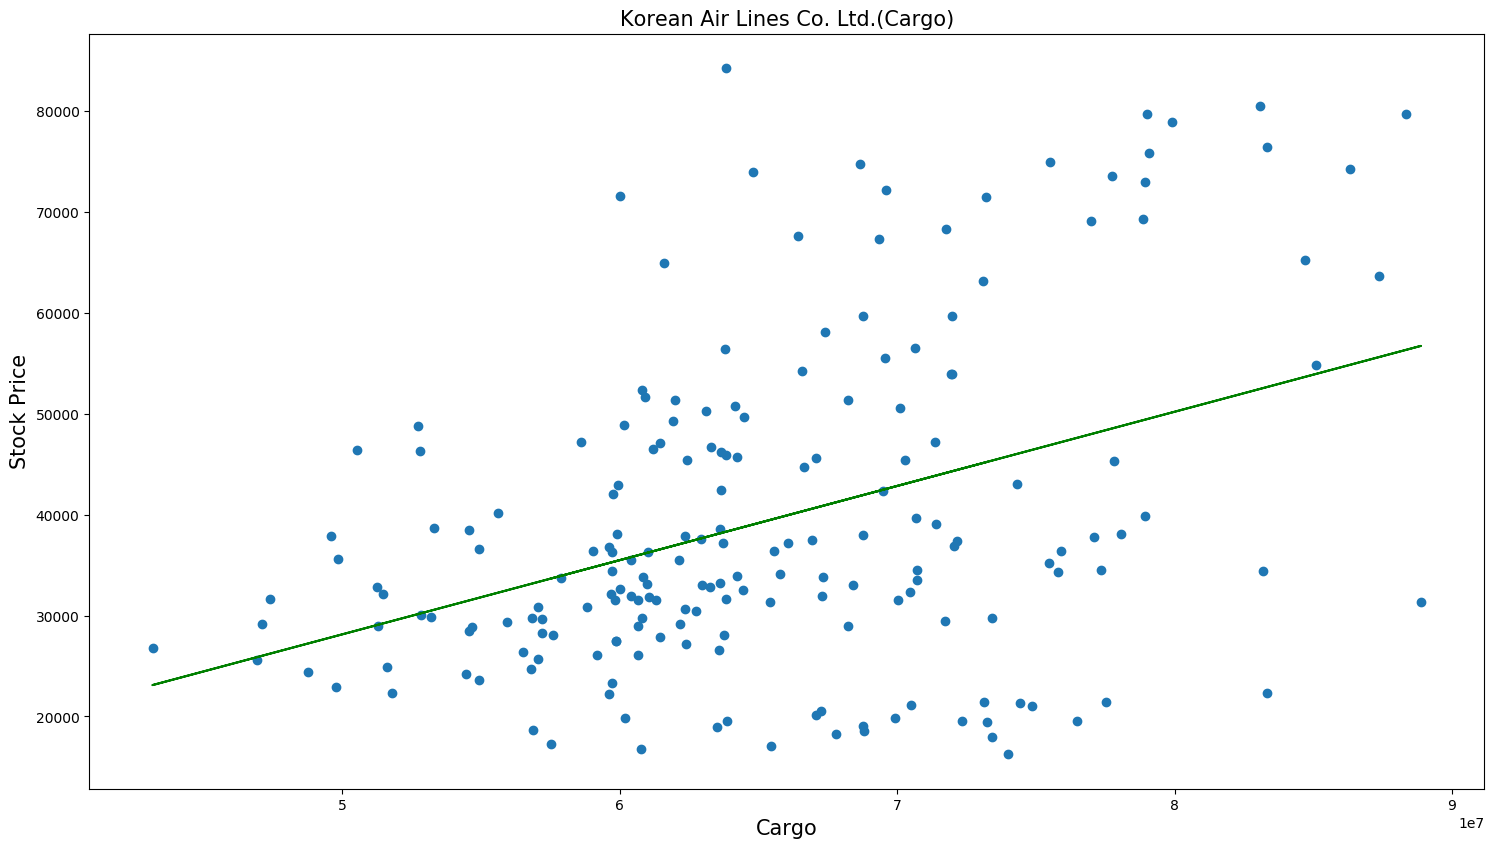

In [24]:
what = 'Freight'
y_value = stockdata['Price'].values[0:195]
x_value = table_Deltaair[dt_between].loc[::-1][what].values[0:195]
line = LinearRegression()
line.fit(x_value.reshape(-1,1),y_value)
plt.plot(x_value, y_value, 'o')
plt.plot(x_value,line.predict(x_value.reshape(-1,1)), color = 'green')
plt.title('{}(Cargo)'.format(company), fontsize = 15)
plt.xlabel('Cargo', fontsize = 15)
plt.ylabel('Stock Price', fontsize = 15)
plt.show()

In [25]:
x_value = sm.add_constant(x_value,has_constant='add')
model = sm.OLS(y_value,x_value)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     38.31
Date:                Thu, 03 Dec 2020   Prob (F-statistic):           3.55e-09
Time:                        12:25:44   Log-Likelihood:                -2148.4
No. Observations:                 195   AIC:                             4301.
Df Residuals:                     193   BIC:                             4307.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8646.3248   7817.668     -1.106      0.270   -2.41e+04    6772.710
x1             0.0007      0.000      6.189      0.000       0.001       0.001
==============================================================================
Omnibus:                        4.801   Durbin-Watson:                   0.204
Prob(Omnibus):                  0.091   Jarque-Bera (JB):                4.766
Skew:                           0.382   Prob(JB):                       0.0923
Kurtosis:                       2.955   Cond. No.                     4.85e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.85e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

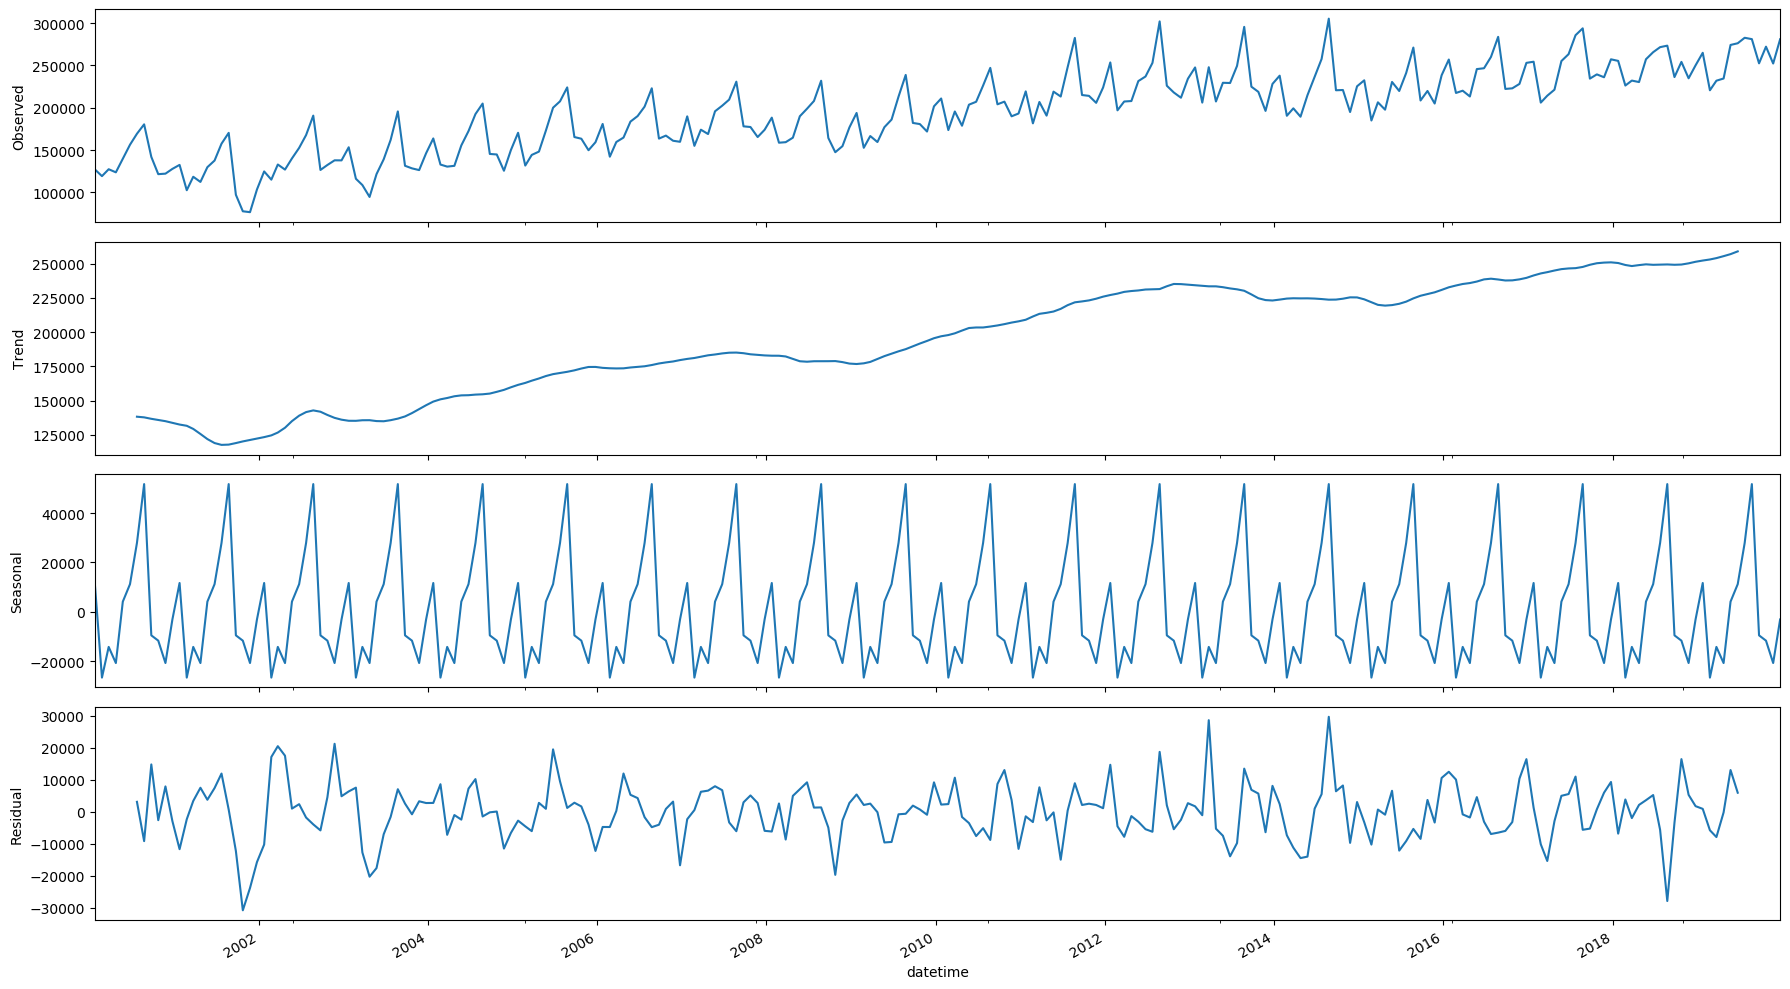

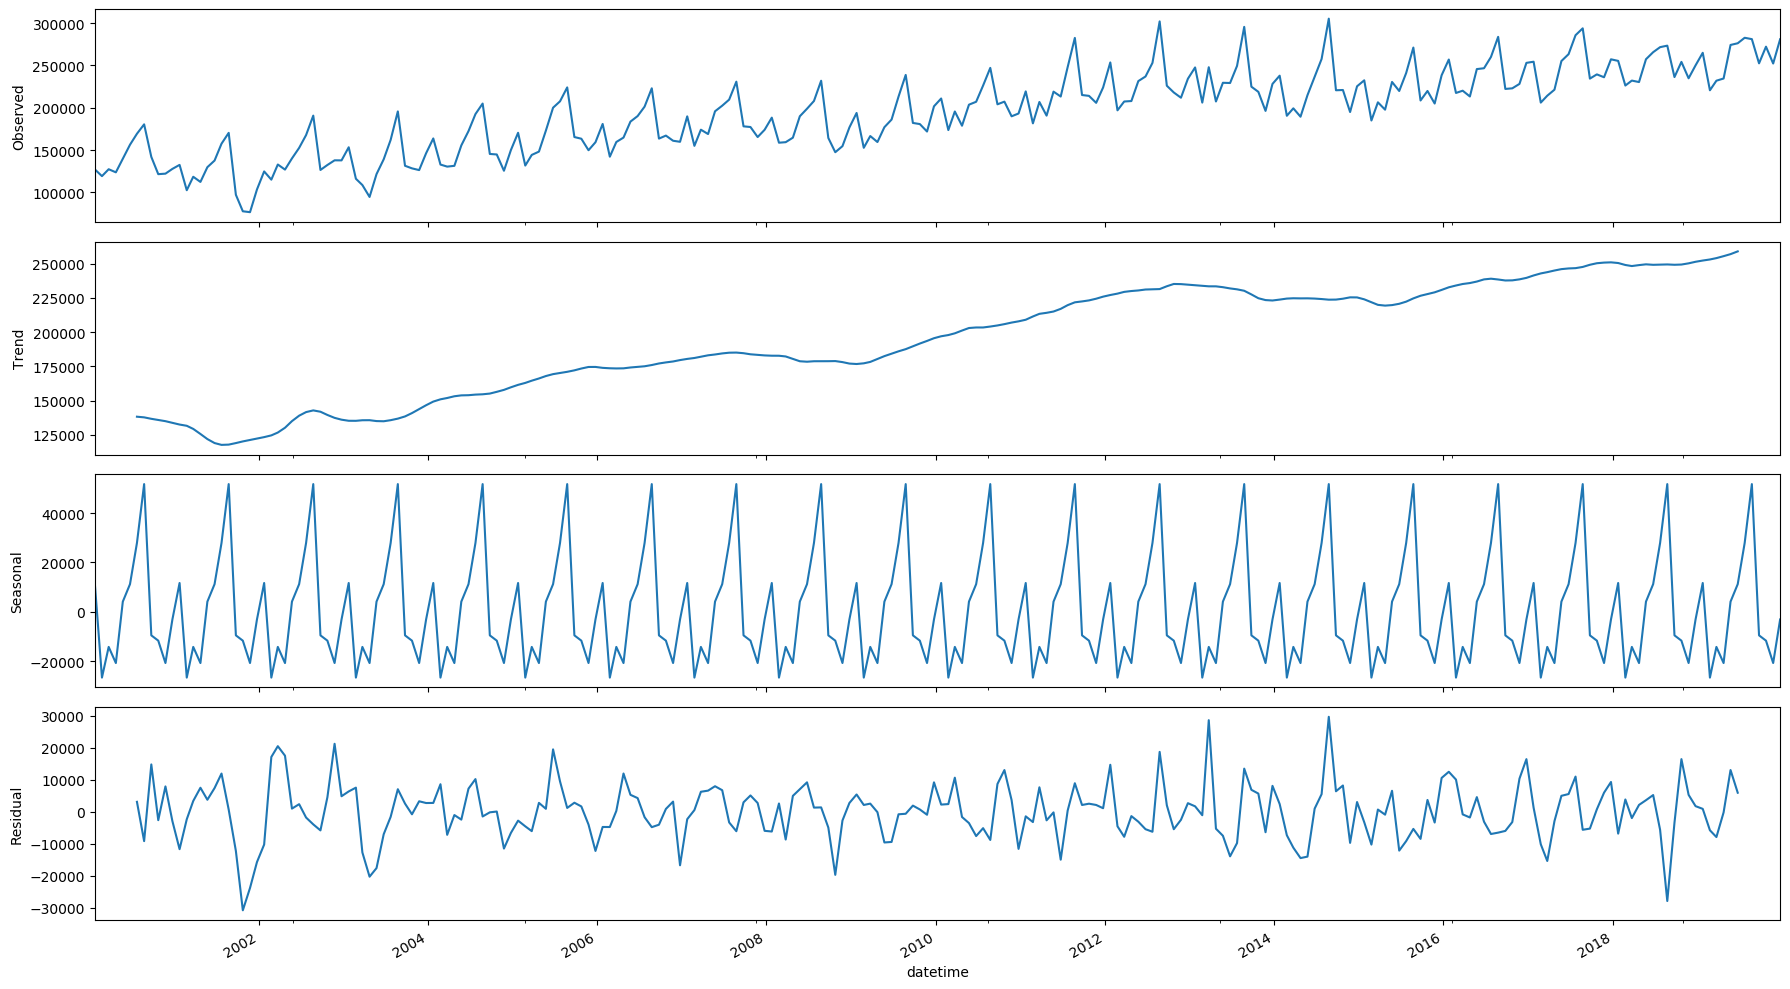

In [26]:
what = 'Passenger'
temp = pd.DataFrame(table_Deltaair[what].values,index = table_Deltaair['datetime'],columns = [what])
ts_Deltaair = temp[temp[what] !=0]
rcParams['figure.figsize'] = 18, 10
rcParams['figure.dpi'] = 100
decomposition = sm.tsa.seasonal_decompose(ts_Deltaair, model='additive', freq = 12)
decomposition.plot()

In [27]:
temp = sm.tsa.seasonal_decompose(ts_Deltaair, model='additive', freq = 12).trend
table_trend = temp[temp[what].notnull()]
newdate = []
for i in range(len(stockdata['Date'])):
    date = ''
    for j in range(len(stockdata['Date'][i].split())):
        if j == 2:
            date += stockdata['Date'][i].split()[j].strip().rstrip('.')
        else:
            date += stockdata['Date'][i].split()[j].strip().rstrip('.')+'-'
    newdate.append(date)
stockdata['newdate'] = newdate
datetime = []
for i in range(len(stockdata['Date'])):
    datetime.append(pd.to_datetime(stockdata['newdate'][i], format='%Y-%m-%d'))
stockdata['datetime'] = datetime
stockdata.head()
price = []
date = []
for i in range(len(table_trend)):
    if stockdata[stockdata['datetime'] == table_trend.index[i]]['Price'].size != 0:
        price.append(stockdata[stockdata['datetime'] == table_trend.index[i]]['Price'].values)          
        date.append(table_trend.index[i])
chart_info = pd.DataFrame(price, index = date, columns = ['Price'])
chart_info[what] = table_trend[what]
chart_info.to_excel(excel_writer=r'C:\Users\com\[MSB535]\data\Breau Data\{} {}.xlsx'.format(company,what))

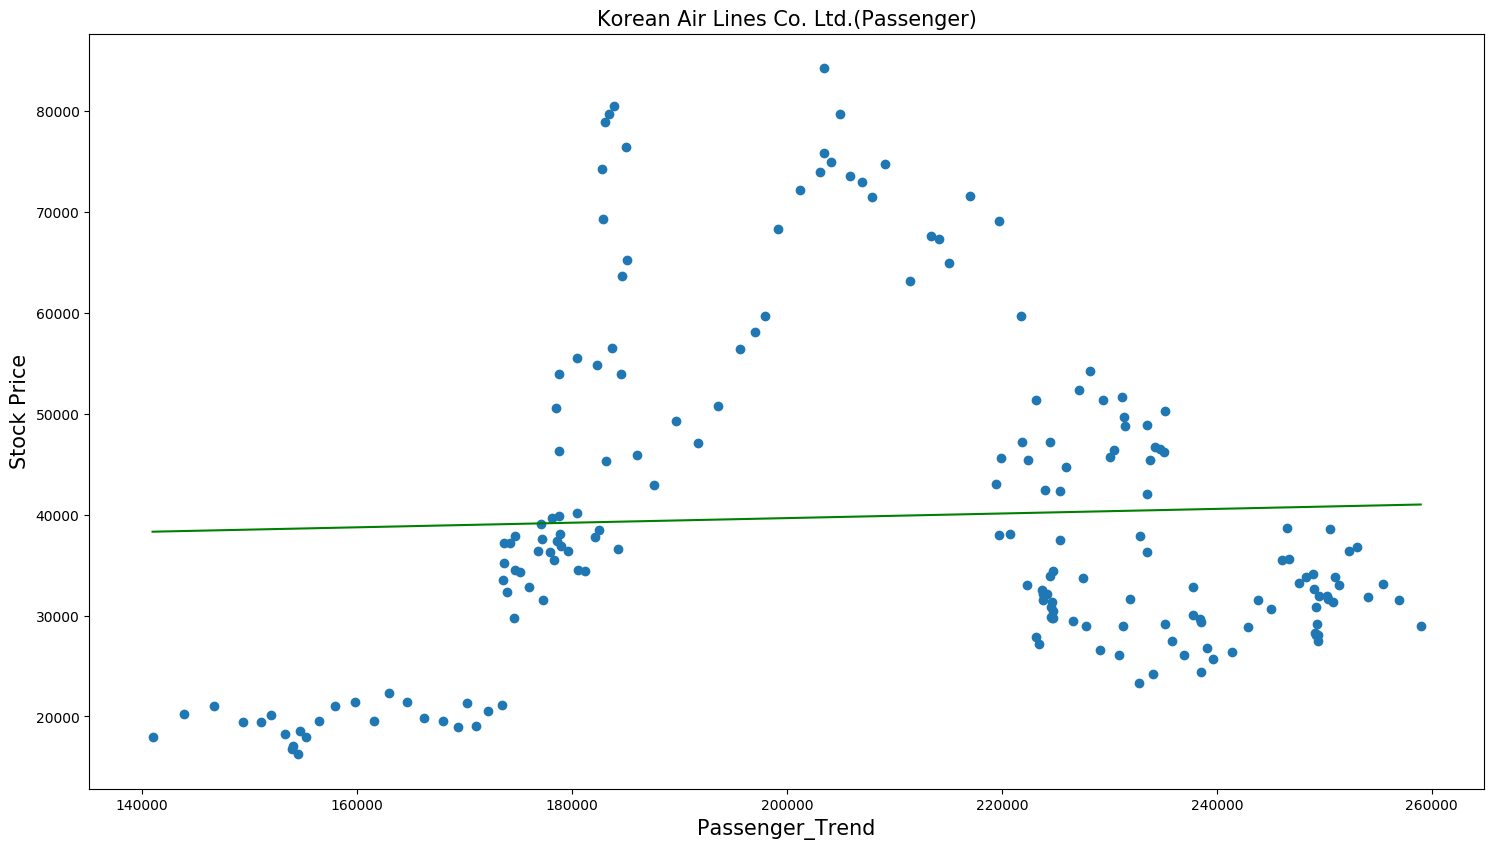

In [28]:
line = LinearRegression()
y_value = chart_info['Price'][0:195]
x_value = chart_info[what].values[0:195]
line.fit(x_value.reshape(-1,1),y_value)
plt.plot(x_value, y_value, 'o')
plt.plot(x_value,line.predict(x_value.reshape(-1,1)), color = 'green')
plt.title('{}(Passenger)'.format(company), fontsize = 15)
plt.xlabel('{}_Trend'.format(what), fontsize = 15)
plt.ylabel('Stock Price', fontsize = 15)
plt.show()

In [29]:
x_value = sm.add_constant(x_value,has_constant='add')
model = sm.OLS(y_value,x_value)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.3653
Date:                Fri, 27 Nov 2020   Prob (F-statistic):              0.546
Time:                        16:53:38   Log-Likelihood:                -2088.5
No. Observations:                 188   AIC:                             4181.
Df Residuals:                     186   BIC:                             4187.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.509e+04   7943.471      4.418      0.000    1.94e+04    5.08e+04
x1             0.0228      0.038      0.604      0.546      -0.052       0.097
==============================================================================
Omnibus:                       23.858   Durbin-Watson:                   0.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.713
Skew:                           0.972   Prob(JB):                     3.53e-07
Kurtosis:                       3.125   Cond. No.                     1.41e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
dt_min = table_Deltaair['Date'] >= stockdata.tail(1)['Date'].values[0]
dt_max = table_Deltaair['Date'] <= stockdata.head(1)['Date'].values[0]
dt_between = dt_min & dt_max

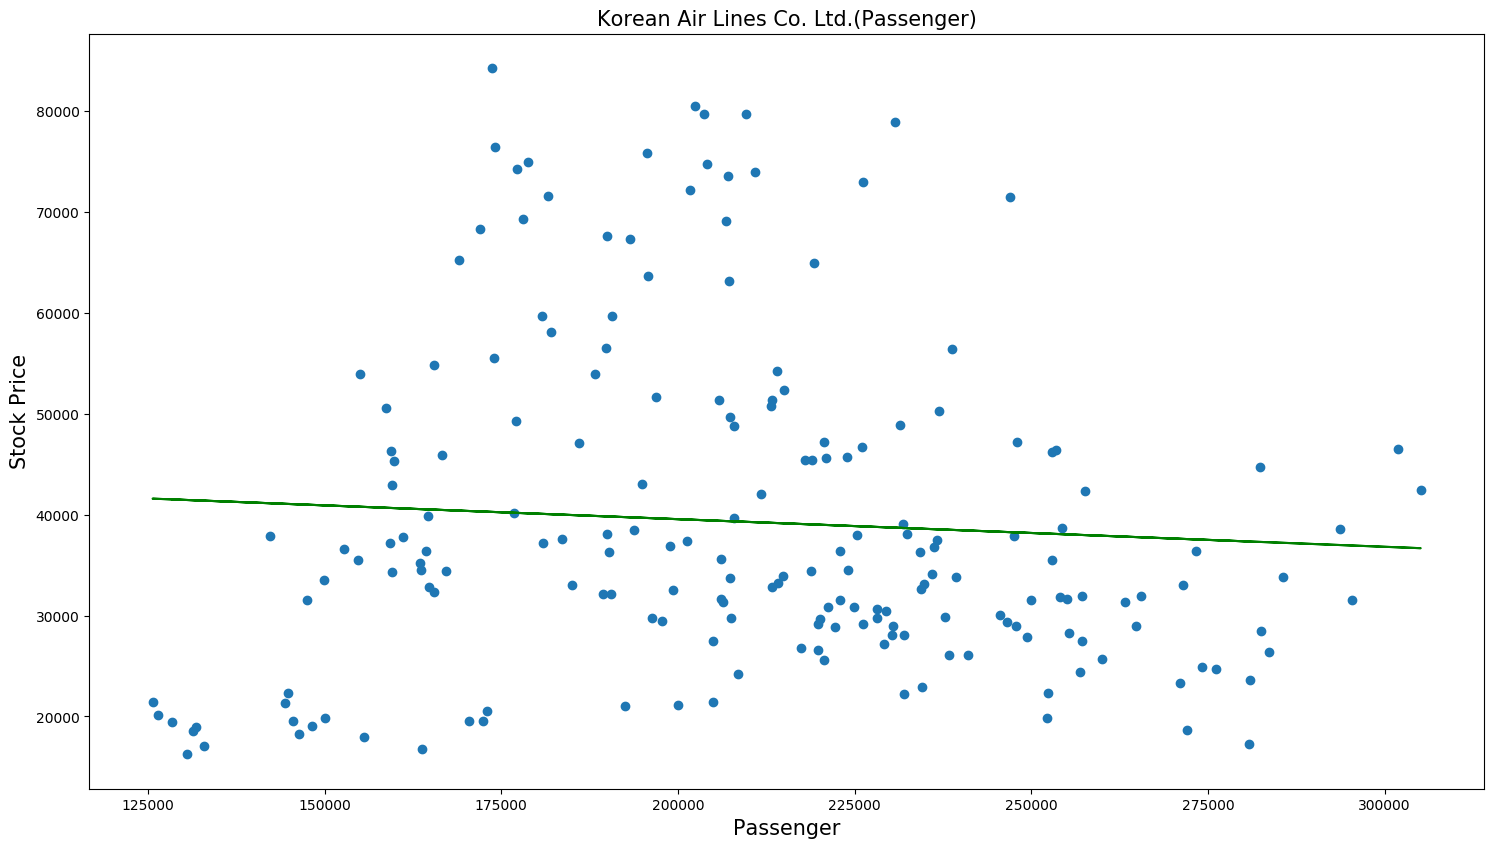

In [31]:
what = 'Passenger'
y_value = stockdata['Price'].values[0:195]
x_value = table_Deltaair[dt_between].loc[::-1][what].values[0:195]
line = LinearRegression()
line.fit(x_value.reshape(-1,1),y_value)
plt.plot(x_value, y_value, 'o')
plt.plot(x_value,line.predict(x_value.reshape(-1,1)), color = 'green')
plt.title('{}(Passenger)'.format(company), fontsize = 15)
plt.xlabel('{}'.format(what), fontsize = 15)
plt.ylabel('Stock Price', fontsize = 15)
plt.show()

In [32]:
x_value = sm.add_constant(x_value,has_constant='add')
model = sm.OLS(y_value,x_value)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8983
Date:                Fri, 27 Nov 2020   Prob (F-statistic):              0.344
Time:                        16:53:38   Log-Likelihood:                -2165.6
No. Observations:                 195   AIC:                             4335.
Df Residuals:                     193   BIC:                             4342.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.503e+04   6163.654      7.306      0.000    3.29e+04    5.72e+04
x1            -0.0274      0.029     -0.948      0.344      -0.084       0.030
==============================================================================
Omnibus:                       22.270   Durbin-Watson:                   0.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.892
Skew:                           0.906   Prob(JB):                     1.45e-06
Kurtosis:                       3.166   Cond. No.                     1.14e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""